In [1]:
from bs4 import BeautifulSoup
import re
import codecs
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import os

In [2]:
output_txt = 'size_output.txt'
total_sites = 28026
path = '../content/'

In [3]:
with tqdm_notebook(total=total_sites) as pbar:
    with open(output_txt, 'w') as out_f:
        out_f.write('{}\t{}\n'.format('doc_id', 'file_size'))
        for doc_id in range(1,total_sites+1):
            file = path + str(doc_id) + '.dat'
            size = os.path.getsize(file)
            out_f.write('{}\t{}\n'.format(doc_id, size))
            pbar.update()

In [4]:
df = pd.read_csv(output_txt, sep='\t', encoding='utf-8', lineterminator='\n')
df.head(2)

,doc_id,file_size
0,1,94556
1,2,34845


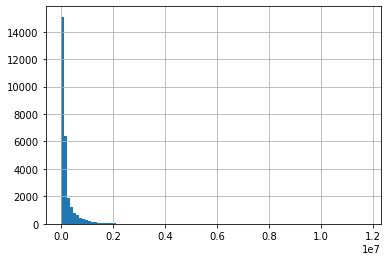

In [7]:
df.file_size.hist(bins=100)

In [8]:
df['log_fsize'] = df['file_size'].apply(np.log)
df.head()

,doc_id,file_size,log_fsize
0,1,94556,11.456948
1,2,34845,10.458665
2,3,618566,13.335159
3,4,596981,13.299641
4,5,98081,11.493549


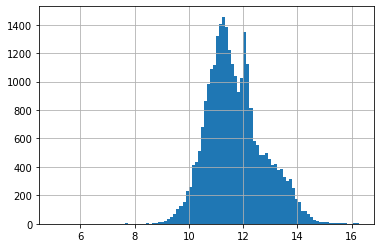

In [9]:
df.log_fsize.hist(bins=100)

In [10]:
df.to_csv('size_log.txt', index=False, sep='\t')